# Generate CSV files with random cluster data for classifiers 

Create a dataset of binary-labelled points in the plane and write them to a set of CSV files (to simulate the way real data may come in).

## Generate it

We want a bunch of points in $\mathbb R^2$. Some red ones, some blue ones. During training, we'll try to find a line that does the best job possible of separating the red points from the blue points.  Let's make two normally distributed clusters: one centred at `c11 = (0,0)` and the other centred at `c2 = (1,1)`.

In [2]:
import numpy as np

def cluster2D(count, mu, sigma):
    return sigma * np.random.randn(count, 2) + mu

def add_column_of_ones(mxn_matrix):
    col_ones = np.ones((mxn_matrix.shape[0],1))
    return np.concatenate((mxn_matrix, col_ones), axis=-1)

def make_dataset(n, c1, c2):
    examples = add_column_of_ones(np.concatenate((c1, c2)))
    labels = np.concatenate((np.zeros(n//2), np.ones(n//2)))
    return examples, labels

N = 100
c1 = cluster2D(N//2, (0,0), (.5,.5))
c2 = cluster2D(N//2, (1,1), (.5,.5))
np_train_data, np_train_lbls = make_dataset(N, c1, c2)

## Visualize it

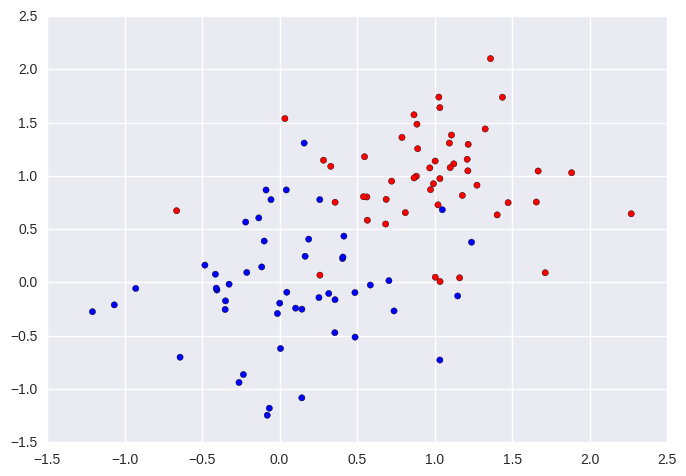

In [3]:
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

vec_colour = np.vectorize(lambda x: ['#0000FF','#FF0000'][int(x)])  # Transform the labels to colours
train_colours=vec_colour(np_train_lbls)
plt.scatter(np_train_data[:,0], np_train_data[:,1], c=train_colours)
plt.show()

## Write it into CSV files
This file-based input data consumption is tremendous overkill for toy data like this, but I'm just practicing for the real thing. 

In [4]:
import os
num_files = 4  # Use more than one file for simulation "realism" (imagine input files coming from DB)
notebook_dir = "cluster2D"
os.makedirs(notebook_dir, exist_ok=True)
for i in range(num_files):
    a = i * (N//4)
    b = np.min([a + (N//4), N])
    filename = os.path.join(notebook_dir, (str(i)+".csv"))
    np.savetxt(fname=filename, 
               X=np.concatenate((np_train_data[a:b,:],np_train_lbls[a:b,None]), axis=-1),
               fmt="%g",
               delimiter=",")
print("Files created: %s" % str(os.listdir(notebook_dir)))

Files created: ['1.csv', '3.csv', '2.csv', '0.csv']
